In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end

using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [2]:
function FHN2_try3(u, p ,t)
    x1, y1, x2, y2, z= u
    ϵ, a, g, k, σ, α, k1, k2 = p

    I(ϕ_i) = g * (1.0/(1.0 + exp(k*(cos(σ/2) - cos(ϕ_i - α - σ/2)))))
    ρz = k1 + k2 * z ^ 2

    ϕ2 = atan(y2, x2)
    ϕ1 = atan(y1, x1)

    dx1dt = (x1 - x1 ^ 3 / 3 - y1 + I(ϕ2) + ρz * (x2 - x1) ) / ϵ
    dy1dt = x1 - a
    dx2dt = (x2 - x2 ^ 3 / 3 - y2 + I(ϕ1) + ρz * (x1 - x2) ) / ϵ
    dy2dt = x2 - a
    dzdt = x1 - x2
    return SVector(dx1dt, dy1dt, dx2dt, dy2dt, dzdt)
end

function FHN2_try3_params()
    ϵ = 0.01; a = -1.01;
    g = 0.1; k = 50.0; σ = 50.0 * pi / 180; α = 160.0 * pi / 180;
    k1 = 0.0; k2 = 0.0
    return [ ϵ, a, g, k, σ, α, k1, k2]
end

FHN2_try3_params (generic function with 1 method)

In [ ]:
0.08998799599866622
[0.048673870875833025, 0.0005013751767232453, -0.0009955890604679584, -Inf, -Inf]
[-1.0643465209857417, -0.6196333721897129, -0.9727093626967238, -0.640292003638936, -0.979341368545446]

In [127]:
[-1.0100000000000315, -0.6367552038434844, -1.0099999999999687, -0.6367552038434867, -1.0]

[-1.0100000000000315, -0.6367552038434844, -1.0099999999999687, -0.6367552038434867, -1.0]


In [147]:
println(sol[end])

[-1.7117513398648507, 0.0563458792245932, -1.6996849035236776, 0.03101255027191213, 0.032031329238622175]


In [130]:
u0cont = [-1.1069931058147577, -0.5872459538473647, -1.1237003529475824, -0.5838969537016518, 0.0033490001401304]

5-element Vector{Float64}:
 -1.1069931058147577
 -0.5872459538473647
 -1.1237003529475824
 -0.5838969537016518
  0.0033490001401304

In [279]:
#=
u0 = [-1.0680209428572809, -0.6349562574228478, -0.925209253237269, -0.6329371527736881, 0.004678895636655959]
parameters[7] = 0.09
parameters[8] = 14.0
tspan = (0.0, 1000)
=#

[-1.0680209428572809, -0.6349562574228478, -0.925209253237269, -0.6329371527736881, 0.004678895636655959]


In [36]:
parameters = FHN2_try3_params()
tspan = (0.0, 2000.0)
parameters[7] = 0.09
parameters[8] = 52.0

u0 = [-1.1382298569118672, -0.5764456626766896, -1.1174132892040585, -0.5815510078806045, 0.011803345489675595]
#[-1.1069931058147577, -0.5872459538473647, -1.1237003529475824, -0.5838969537016518, -1.0033490001401304]
u0 = SVector{5}(u0)
prob = ODEProblem(FHN2_try3, u0, tspan, parameters)
sol = solve(prob, DP8(), adaptive = true, abstol = 1e-12, reltol = 1e-12);

ds = CoupledODEs(FHN2_try3, sol[end], parameters,
diffeq = ( alg = DP8(), adaptive = true, abstol = 1e-12, reltol = 1e-12));
LLE = lyapunovspectrum(ds, 1000)

5-element Vector{Float64}:
   0.12947418827135768
   0.007536554095633325
  -0.016941686258717722
 -Inf
 -Inf

In [37]:
indexx, indexy, indexz = 1, 3, 4

ticksize = 25
labelsize = 40
lw = 1.0
colorline = :deeppink

:deeppink

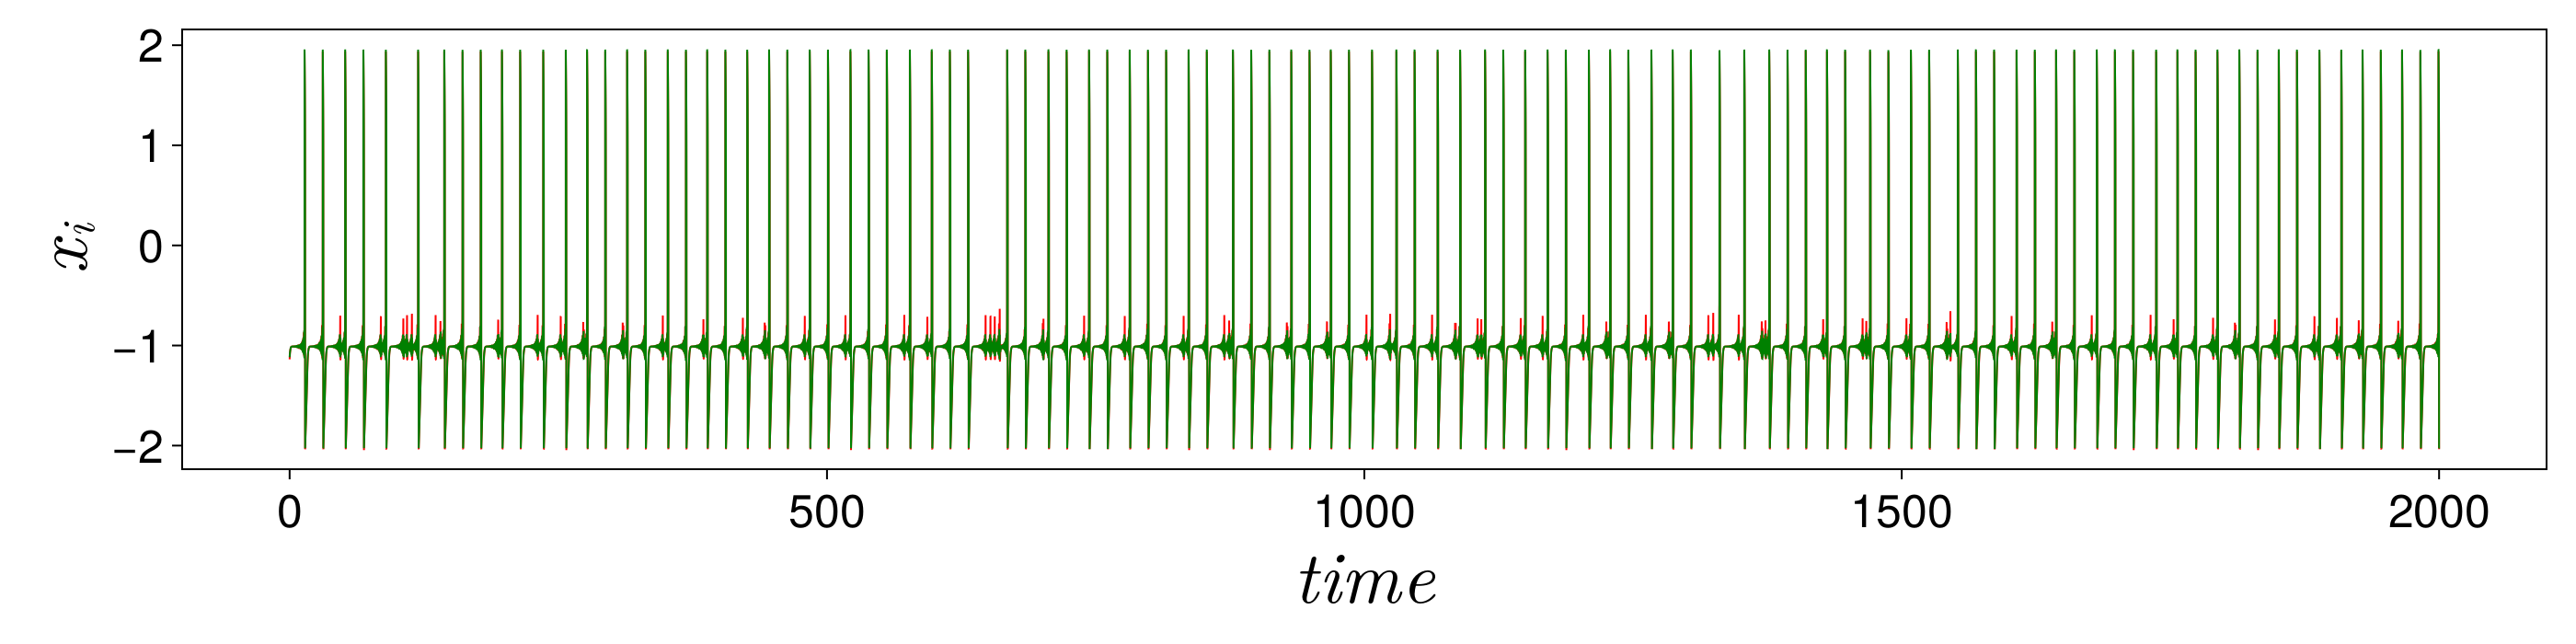

CairoMakie.Screen{IMAGE}


In [38]:
tstart = 1; tend = length(sol)
#tstart = 400000; tend = 1500000
f = Figure(size = (1400, 350))
ax = Axis(f[1,1], xlabel = L"time", ylabel = L"x_i", xlabelsize = labelsize, ylabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, xgridvisible = false, ygridvisible = false)
lines!(ax, sol.t[tstart:tend], sol[indexx, tstart:tend], color = :red, linewidth = lw)
lines!(ax, sol.t[tstart:tend], sol[indexy, tstart:tend], color = :green, linewidth = lw)
display(f)

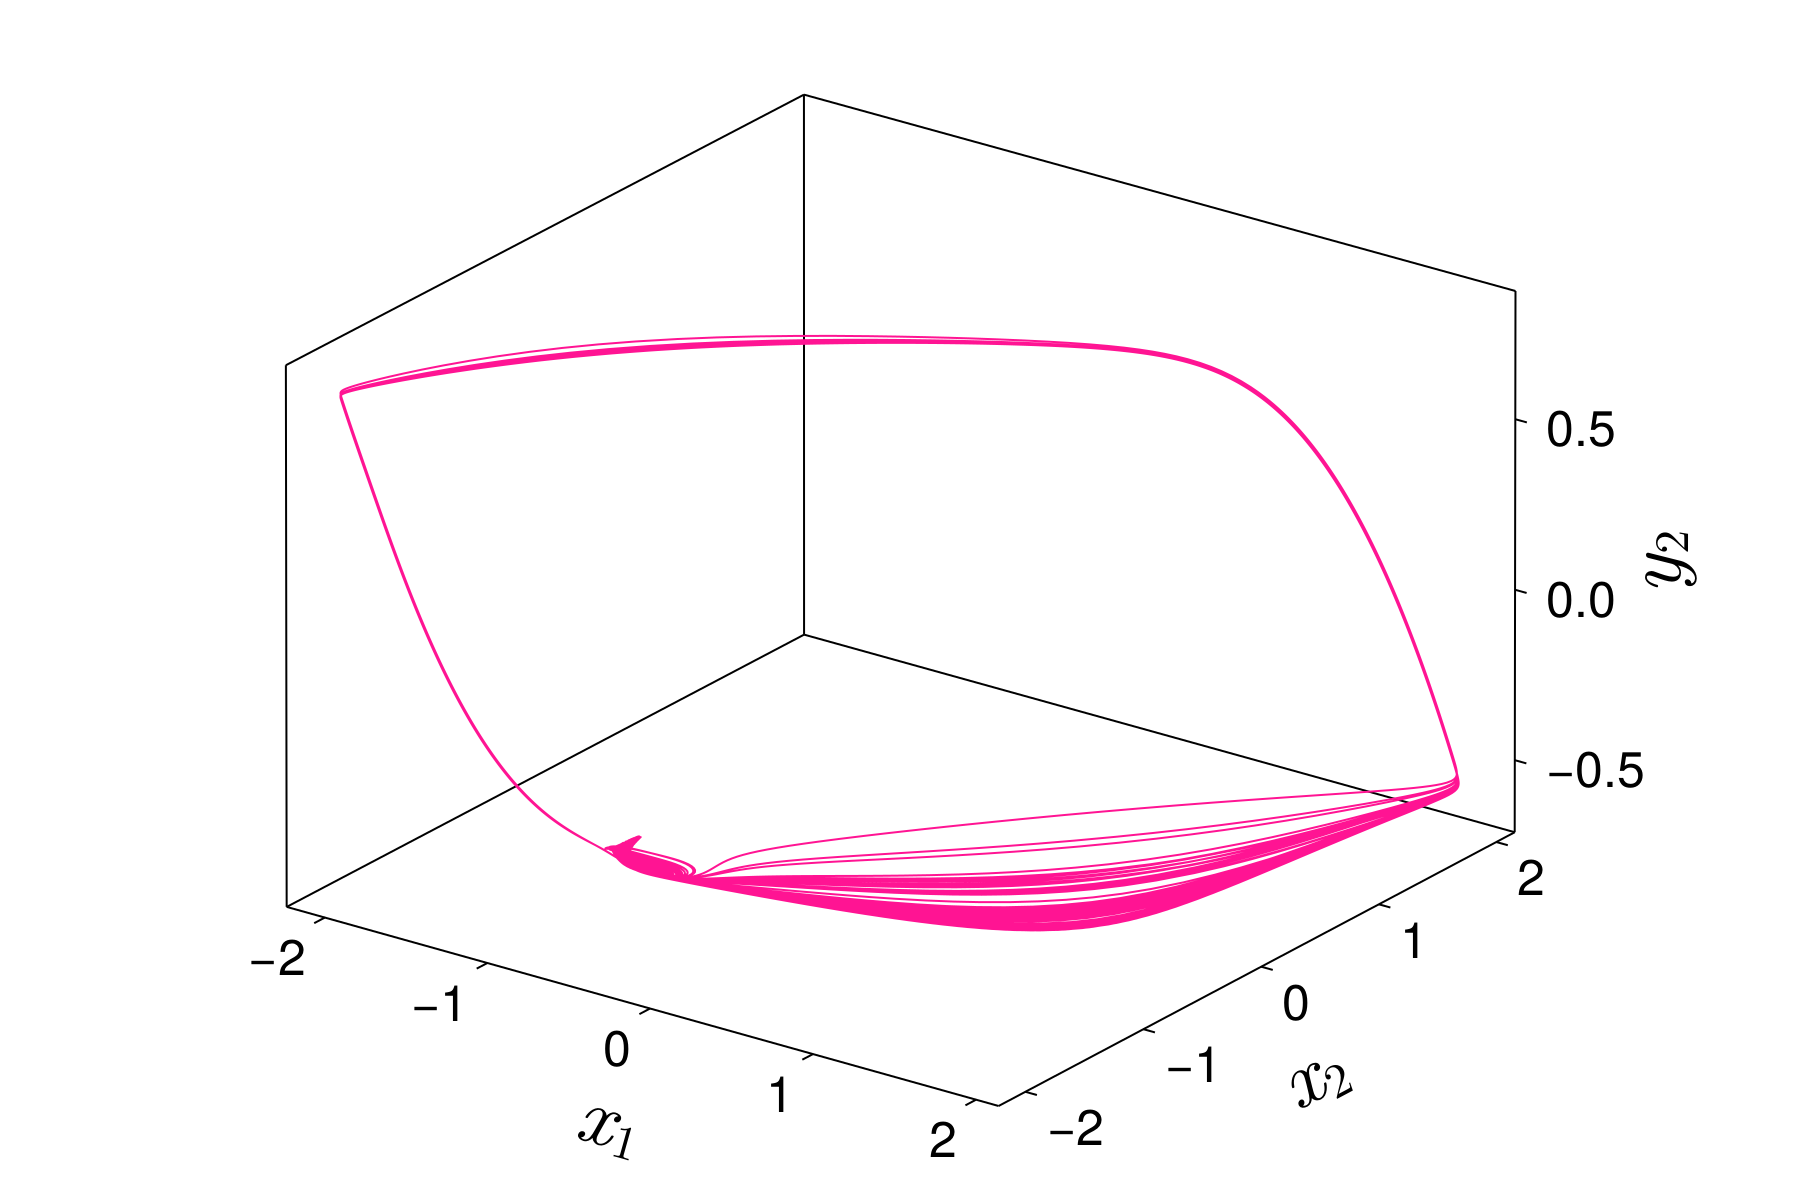

CairoMakie.Screen{IMAGE}


In [39]:
indexx, indexy, indexz = 1, 3, 4
az = -0.3pi
f = Figure(size = (900, 600))
ax3d = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"y_2", xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
 xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
    azimuth = az, xgridvisible = false, ygridvisible = false, zgridvisible = false)
lines!(ax3d, sol[indexx, tstart:tend], sol[indexy, tstart:tend], sol[indexz, tstart:tend], linewidth = lw, color = colorline)
display(f)

In [51]:
integ_set = (alg = RK4(), adaptive = false, dt = 0.001)
ds = CoupledODEs(FHN2_try3, sol[1], parameters, diffeq = integ_set)

pmap = PoincareMap(ds, (3, -0.87))

tr, trange = trajectory(pmap, 10000)

(5-dimensional StateSpaceSet{Float64} with 10001 points, 0:1:10000)

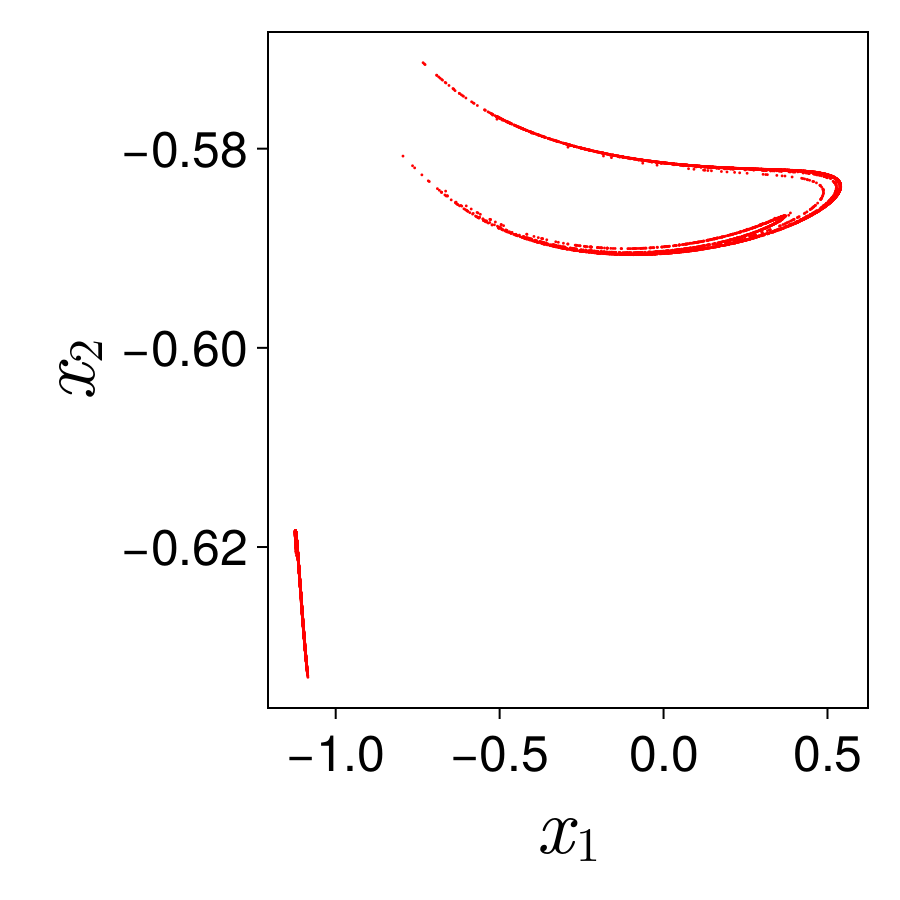

CairoMakie.Screen{IMAGE}


In [52]:
tstartpo = 100; tendpo = length(tr)
indexx = 1; indexy = 2

f = Figure(size = (450, 450))
ax = Axis(f[1, 1], xgridvisible = false, ygridvisible = false,
xlabel = L"x_1", ylabel = L"x_2", xlabelsize = labelsize, ylabelsize = labelsize,
xticklabelsize = ticksize, yticklabelsize = ticksize)
scatter!(tr[tstartpo:tendpo, indexx], tr[tstartpo:tendpo, indexy], color = :red, markersize = 2.0)

display(f)